## Foreword

Word embeddings are dense vector representations of words that capture semantic relationships. This can be useful in, for example, sentiment analysis of movie reviews. There are two main methods to generate these representations: Word2Vec, and GloVe

## 1. Introduction to Word2Vec
 

Word2Vec is predictive model that learns word embeddings by predicting words based on their context. It uses two architectures:

- Continuous Bag of Words (CBOW): Predicts a target word from its context.

- Skip-Gram: Predicts the context words from a target word.

The core idea of using these architectures is that because the word embeddings are used for predictions, as the predictions get better the word embeddings also get better. 

## **2. Mathematical Background**

### **2.1 Objective Function**

The fundamental objective of Word2Vec is to maximize similarity (dot product) between two words that frequently appear in the same context. Word2Vec uses a neural network with one hidden layer to learn word embeddings. The goal is to maximize the probability of predicting context words given a target word (Skip-Gram) or vice versa (CBOW). Given some context, Skip-gram maximizes P(W_target | W_context) while CBOW maximizes P(W_context | W_target). The probability P(W_o | W_i) is computed through softmax.

### **2.2 Negative sampling**
Because there can be many contexts in training data, computing softmax for all of them can be slow. We use a sampling approach to speed things up. Given W_context and W_target, we select randomly chosen contexts. We then reason that the words in W_context should have a higher similarity with W_target than the words in some randomly selected contexts.

In [4]:
!pip install gensim
!pip install matplotlib
!pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 19.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 67.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 64.7 MB/s eta 0:00:00


In [7]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

In [31]:
sentences = [
    "I love natural language processing.",
    "Word2Vec is a great tool for NLP.",
    "Deep learning models are powerful.",
    "Machine learning is transforming the world.",
    "Word embeddings capture semantic meaning."
]

tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]
print("Tokenized Sentences:", tokenized_sentences)

Tokenized Sentences: [['love', 'natural', 'language', 'processing'], ['word', 'vec', 'is', 'great', 'tool', 'for', 'nlp'], ['deep', 'learning', 'models', 'are', 'powerful'], ['machine', 'learning', 'is', 'transforming', 'the', 'world'], ['word', 'embeddings', 'capture', 'semantic', 'meaning']]


In [32]:
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,                
    window=5,                     
    min_count=1,     
    sg=1,                  
    negative=5,      
    workers=4       
)

model.save("word2vec.model")

Let's see the vector embedding for 'natural'.

In [33]:
vector = model.wv['natural']
print(vector)

[-8.7283310e-03  2.1303685e-03 -8.7362912e-04 -9.3199946e-03
 -9.4290590e-03 -1.4108551e-03  4.4328393e-03  3.7044312e-03
 -6.4993249e-03 -6.8737357e-03 -4.9998984e-03 -2.2870665e-03
 -7.2509926e-03 -9.6042510e-03 -2.7438961e-03 -8.3636539e-03
 -6.0394630e-03 -5.6714802e-03 -2.3443655e-03 -1.7071631e-03
 -8.9578694e-03 -7.3527091e-04  8.1532989e-03  7.6911775e-03
 -7.2068162e-03 -3.6671876e-03  3.1188552e-03 -9.5716529e-03
  1.4765827e-03  6.5251007e-03  5.7469783e-03 -8.7639140e-03
 -4.5175832e-03 -8.1409523e-03  4.5960842e-05  9.2645343e-03
  5.9738862e-03  5.0678006e-03  5.0615547e-03 -3.2432324e-03
  9.5531121e-03 -7.3571396e-03 -7.2710942e-03 -2.2656093e-03
 -7.7863631e-04 -3.2164161e-03 -5.9264345e-04  7.4895509e-03
 -6.9758639e-04 -1.6250986e-03  2.7446661e-03 -8.3599137e-03
  7.8565674e-03  8.5369339e-03 -9.5850183e-03  2.4465041e-03
  9.9059343e-03 -7.6665487e-03 -6.9675958e-03 -7.7372692e-03
  8.3967391e-03 -6.8140216e-04  9.1452980e-03 -8.1590144e-03
  3.7434485e-03  2.63529

Obviously words not in the contexts cannot be found.

In [34]:
try:
    vector = model.wv['toilet']
    print(vector)
except:
    print("Key is not here.")

Key is not here.


We can check similar words:

In [35]:
similar_words = model.wv.most_similar('language')
print("Words similar to 'language':", similar_words)

Words similar to 'language': [('powerful', 0.16378769278526306), ('learning', 0.14598838984966278), ('the', 0.11076650023460388), ('embeddings', 0.09429287165403366), ('transforming', 0.07480262964963913), ('tool', 0.050482068210840225), ('meaning', 0.041577357798814774), ('nlp', 0.034767989069223404), ('natural', 0.019152270630002022), ('word', 0.01628565974533558)]


Because the embeddings are vectors, you can add or subtract them to get "word analogies".

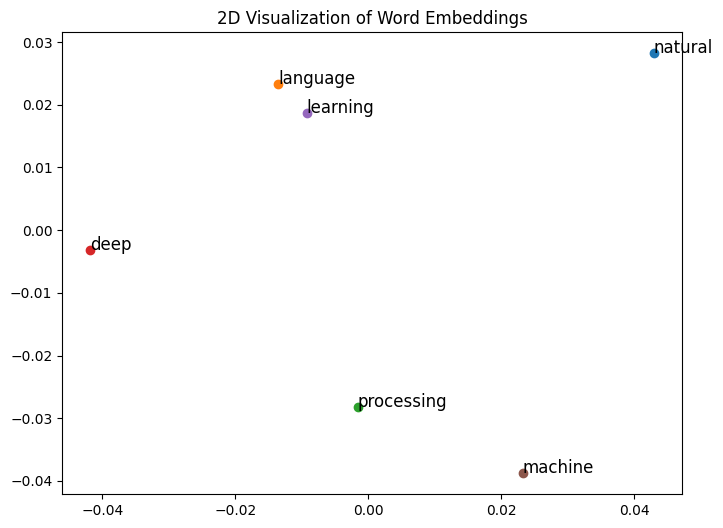

In [41]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ['natural', 'language', 'processing', 'deep', 'learning', 'machine']
word_vectors = np.array([model.wv[word] for word in words])

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word, fontsize=12)
plt.title("2D Visualization of Word Embeddings")
plt.show()

## 3. Introduction to GloVe
While Word2Vec uses CBOW and Skip-Gram, GloVe generates word embeddings by constructing a co-occurrence matrix. (i.e., counting the number of times a word is within the context window of another word, for every word-word pair)

## 4. Mathematical Background

### 4.1 Objective Function
Given two word embeddings, GloVe seeks to minimize the difference between their dot product (similarity) and the logarithm of the probability of co-ocurrence. However, since it is impossible to zero the difference for every word embedding pair, GloVe uses weighted least-squares for the overall objective function.

To see the code in action, we need to download pre-trained GloVe embeddings.

In [1]:
import os
import zipfile

if not os.path.exists("glove.6B.zip"):
    !wget http://nlp.stanford.edu/data/glove.6B.zip

if not os.path.exists("glove.6B"):
    with zipfile.ZipFile("glove.6B.zip", 'r') as zip_ref:
        zip_ref.extractall("glove.6B")

--2025-01-31 01:10:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving ga.dp.tech (ga.dp.tech)... 10.255.254.7, 10.255.254.37, 10.255.254.18
Connecting to ga.dp.tech (ga.dp.tech)|10.255.254.7|:8118... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-31 01:10:30--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to ga.dp.tech (ga.dp.tech)|10.255.254.7|:8118... connected.
Proxy request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-31 01:10:31--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Connecting to ga.dp.tech (ga.dp.tech)|10.255.254.7|:8118... connected.
Proxy request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.08MB/s    in 2m 42s  

2025-01-31 01:13:14 (5.07 MB/s) - ‘

In [2]:
import numpy as np

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_path = "glove.6B/glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_path)

We can visualize the embeddings in 2d using the same method as before.

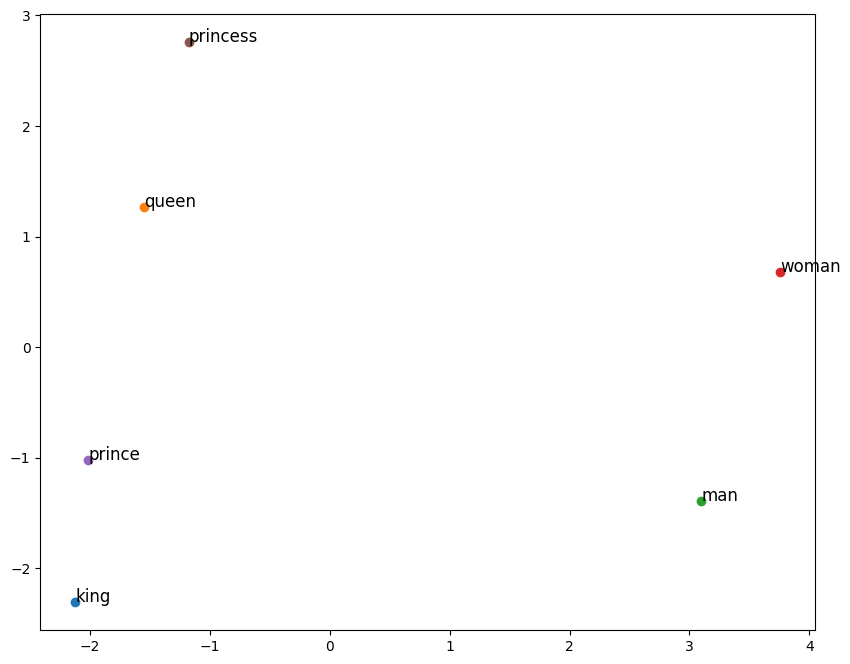

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_embeddings(words, embeddings):
    # Get vectors for the words
    vectors = np.array([embeddings[word] for word in words])
    
    # Reduce dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    
    # Plot the words
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
        plt.text(vectors_2d[i, 0], vectors_2d[i, 1], word, fontsize=12)
    plt.show()

# Example: Visualize some related words
words_to_plot = ["king", "queen", "man", "woman", "prince", "princess"]
plot_embeddings(words_to_plot, glove_embeddings)